In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

data_path = r'YOURPATH\titanic_data.csv'
data = pd.read_csv(data_path)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [3]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
#We need to extract title from Name Column
title = data["Name"].apply(lambda name: name.split(", ")[1].split(".")[0])

In [5]:
title.value_counts()

Name
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [6]:
data["Title"] = data["Name"].apply(lambda name: name.split(", ")[1].split(".")[0])

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [8]:
title_mapping = {"Mr": 0, "Miss":1, "Mrs": 2, "Ms": 1,
                 "Sir": 3,"Master": 3, "Rev": 3, "Dr": 3, "Capt": 3, "Major": 3, 
                 "Col": 3,  "Jonkheer": 3, "Don": 3, "Mlle": 3, "Mme": 3, "Lady": 3, "the Countess": 3, "Dona": 3}

In [9]:
data['Title'] = data['Title'].map(title_mapping)

In [10]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2


In [11]:
data.replace(["male", "female"], ["1", "0"], inplace = True)

In [12]:
#Missing Values

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [14]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [15]:
#Some values are null
#lets predict their age using mean by sex an pclass

In [16]:
mean_age = data.groupby(["Sex", "Pclass"])["Age"].mean()
mean_age

Sex  Pclass
0    1         34.611765
     2         28.722973
     3         21.750000
1    1         41.281386
     2         30.740707
     3         26.507589
Name: Age, dtype: float64

In [17]:
def fill_nan_age(row):
    if pd.isnull(row["Age"]):
        return mean_age[row["Sex"], row["Pclass"]]
    else:
        return row["Age"]

In [18]:
data["Age"] = data.apply(fill_nan_age, axis = 1)

In [19]:
data["Age"].isna().sum()

0

In [20]:
#Now lets separate and categorize data by ages in different categories
# child: 0
# young: 1
# adult: 2
# mid-age: 3
# senior: 4

In [21]:
def binning_age(age):
    if age <= 16:
        return 0
    elif age > 16 and age <= 26:
        return 1
    elif age > 26 and age <= 36:
        return 2
    elif age > 36 and age <= 62:
        return 3
    else:
        return 4

In [22]:
data["Age"] = data["Age"].apply(binning_age)

In [23]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,PC 17599,71.2833,C85,C,2


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 90.6+ KB


In [25]:
data["Age"].value_counts()

Age
2    314
1    261
3    201
0    100
4     15
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='count'>

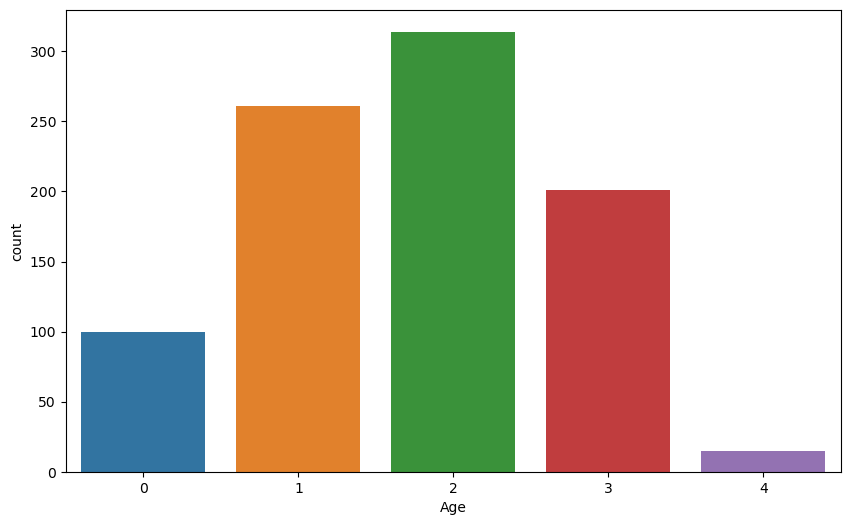

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', data=data)

In [29]:
#Lets save this cleaned data
data.to_csv(r"YOURPATH\titanic_data_cleaned.csv", index=False)

In [30]:
titanic_data = pd.read_csv(r"YOURPATH\titanic_data_cleaned.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,8.0500,NaN,S,0


In [31]:
td = titanic_data

In [32]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,8.0500,NaN,S,0


In [33]:
td.shape

(891, 13)

In [34]:
td.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,1.741863,0.523008,0.381594,32.204208,0.708193
std,257.353842,0.486592,0.836071,0.477990,0.984503,1.102743,0.806057,49.693429,0.965780
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,1.000000,2.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,2.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,4.000000,8.000000,6.000000,512.329200,3.000000


In [35]:
survived = td.Survived == True
survived

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [36]:
died = td.Survived == False

In [37]:
print("Average Fare Price for People who Survied People: ", td.Fare[survived].mean())
print("Average Fare Price for People who died: ", td.Fare[died].mean())

Average Fare Price for People who Survied People:  48.39540760233918
Average Fare Price for People who died:  22.117886885245902


In [38]:
# Preliminary data inspection
print("First 5 rows of the dataset:")
print(td.head(), "\n")

First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1    1      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0    3      1      0   
2                             Heikkinen, Miss. Laina    0    1      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0    2      1      0   
4                           Allen, Mr. William Henry    1    2      0      0   

             Ticket     Fare Cabin Embarked  Title  
0         A/5 21171   7.2500   NaN        S      0  
1          PC 17599  71.2833   C85        C      2  
2  STON/O2. 3101282   7.9250   NaN        S      1  
3            113803  53.1000  C123        S      2  
4       

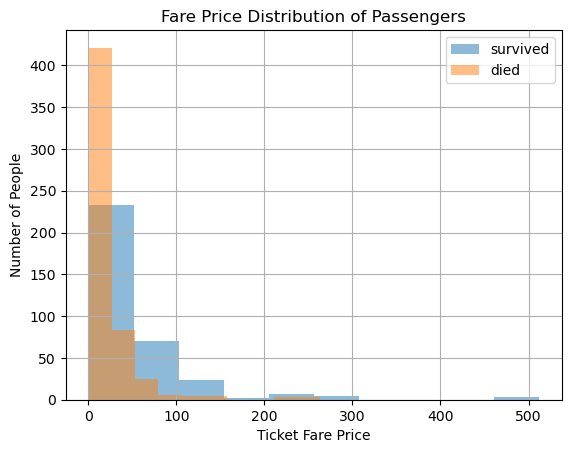

In [40]:
#Survival chart
td.Fare[survived].hist(alpha = 0.5, label = "survived");
td.Fare[died].hist(alpha = 0.5, label = "died");
plt.title("Fare Price Distribution of Passengers")
plt.xlabel("Ticket Fare Price")
plt.ylabel("Number of People")
plt.legend();

In [41]:
#Seems like people with more expensive tickets survive more.

In [42]:
print("Dataset information:")
td.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


In [43]:
# Exploratory Data Analysis (EDA)

In [44]:
## Setting the aesthetic style of the plots
sns.set()

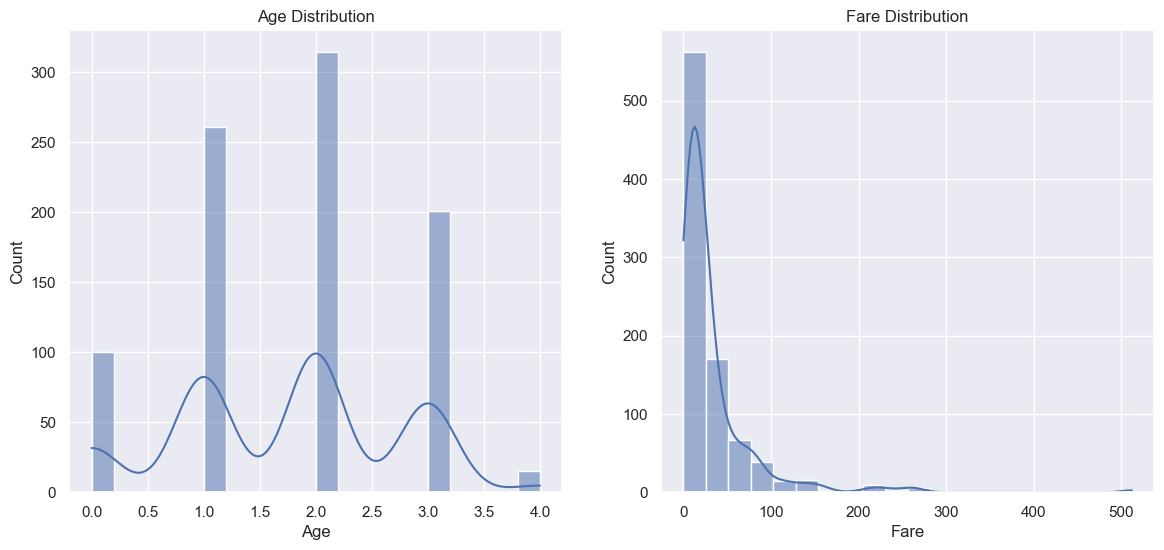

In [45]:
# Distribution of key features: Age and Fare
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(td['Age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(td['Fare'], bins=20, kde=True)
plt.title('Fare Distribution')
plt.show()

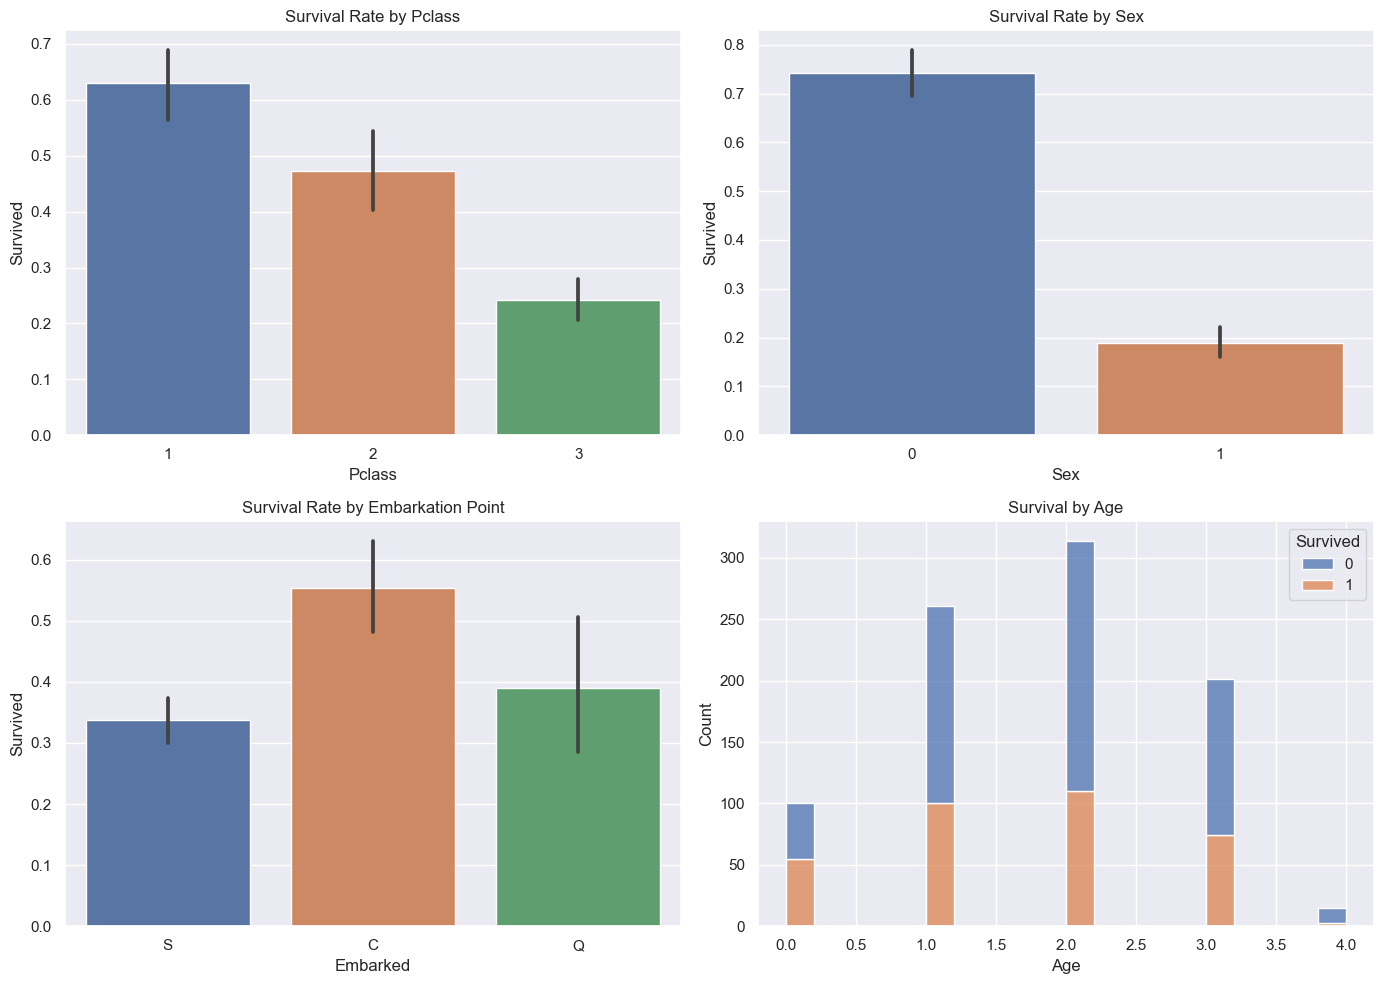

In [46]:
# Survival rate by key categories: Pclass, Sex, Embarked
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.barplot(x='Pclass', y='Survived', data=td, ax=axs[0, 0])
axs[0, 0].set_title('Survival Rate by Pclass')

sns.barplot(x='Sex', y='Survived', data=td, ax=axs[0, 1])
axs[0, 1].set_title('Survival Rate by Sex')

sns.barplot(x='Embarked', y='Survived', data=td, ax=axs[1, 0])
axs[1, 0].set_title('Survival Rate by Embarkation Point')

sns.histplot(data=td, x='Age', hue='Survived', multiple="stack", bins=20, ax=axs[1, 1])
axs[1, 1].set_title('Survival by Age')

plt.tight_layout()
plt.show()

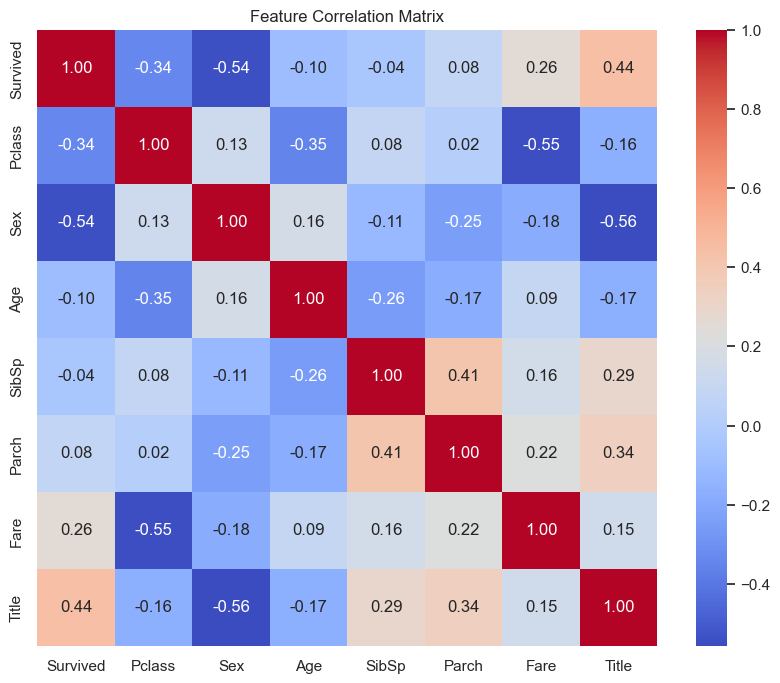

In [47]:
# Manually specifying numeric columns for correlation analysis
numeric_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title']
numeric_data = td[numeric_columns]

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [48]:
# Missing Values Analysis
missing_values = td.isnull().sum()
print("\nMissing Values in the Dataset:\n", missing_values[missing_values > 0])


Missing Values in the Dataset:
 Cabin       687
Embarked      2
dtype: int64


In [49]:
# Selecting features and target variable
features = td[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title']]
target = td['Survived']

In [54]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [56]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
# Initializing and training the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, Y_train)

LogisticRegression()

In [58]:
# Predicting survival on the test set
predictions = model.predict(X_test_scaled)

# Evaluating the model
print("Accuracy:", accuracy_score(Y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, predictions))
print("\nClassification Report:\n", classification_report(Y_test, predictions))

Accuracy: 0.7932960893854749

Confusion Matrix:
 [[87 18]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



In [59]:
# Creating a new feature for family size
td['FamilySize'] = td['SibSp'] + td['Parch'] + 1

In [60]:
# Selecting features for clustering
cluster_features = td[['Age', 'Fare', 'FamilySize']]
cluster_features_scaled = scaler.fit_transform(cluster_features)

In [61]:
#To avoid memory leak we need to set env variable.
os.environ['OMP_NUM_THREADS'] = '4'

In [65]:
# Determining the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(cluster_features_scaled)
    wcss.append(kmeans.inertia_)



Text(0, 0.5, 'WCSS')

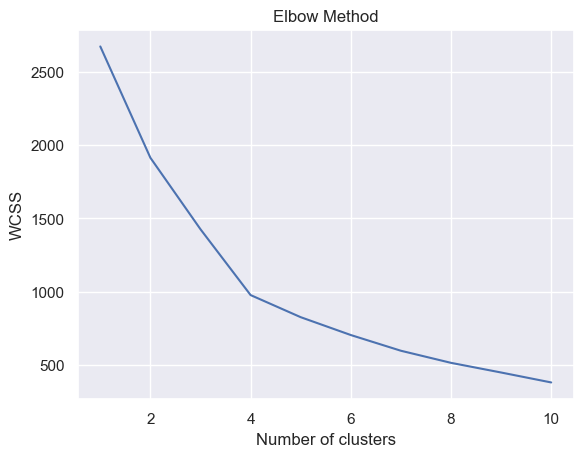

In [64]:
# Plotting the results onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares